In [128]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*- #

# ------------------------------------------------------------------------------
#
#   Copyright (C) 2022 Concordia NAVlab. All rights reserved.
#
#   @Filename: draw_depth_estimation_res.py
#
#   @Author: Shun Li
#
#   @Date: 2022-01-13
#
#   @Email: 2015097272@qq.com
#
#   @Description:
#
# ------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import MultipleLocator

In [129]:
depth_whole = pd.read_csv("/home/ls/m300_depth_filter/m300_depth_data/m300_grabbed_data_1_51.2/depth_estimation.csv")
depth_whole

,index,x,y,z,Unnamed: 4
0,15,6.223577,-1.138103,47.366623,NaN
1,15,5.581629,-0.900353,45.545071,NaN
2,15,5.195626,-0.814715,42.260765,NaN
3,15,6.450550,-0.907780,47.347134,NaN
4,15,4.945930,-0.725369,39.415230,NaN
...,...,...,...,...,...
5333,206,6.302209,-0.783247,50.030926,NaN
5334,206,6.402049,-0.712236,49.756046,NaN
5335,206,6.214792,-0.645272,50.069836,NaN
5336,206,6.318874,-0.855441,49.943138,NaN


In [130]:
x = depth_whole["x"].to_numpy()
y = depth_whole["y"].to_numpy()
z = depth_whole["z"].to_numpy()
index = depth_whole["index"].to_numpy()

cond = (z > 10)&(z<80)
x = x[cond]
y = y[cond]
z = z[cond]
index = index[cond]


In [131]:
font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 16,
}

In [132]:
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

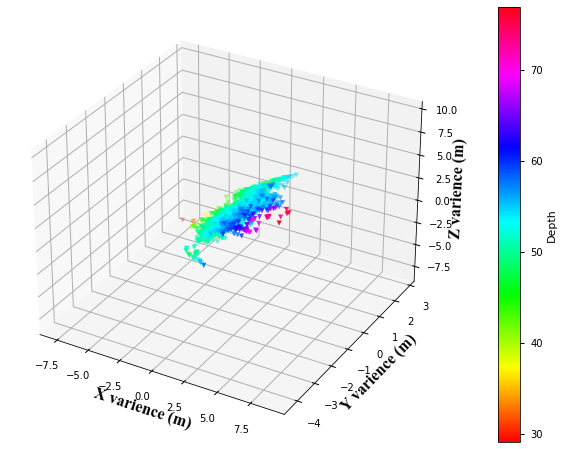

In [133]:
style.use('seaborn-notebook')

fig = plt.figure(figsize=[20,8])
ax = fig.gca(projection='3d')

p2 = ax.scatter3D(standardization(x), standardization(y), standardization(z), marker = "v", c=z, cmap="hsv")

ax.set_xlabel('X varience (m)', font=font1) # 画出坐标轴
ax.set_ylabel('Y varience (m)', font=font1)
ax.set_zlabel('Z varience (m)', font=font1)
fig.colorbar(p2,label="Depth")

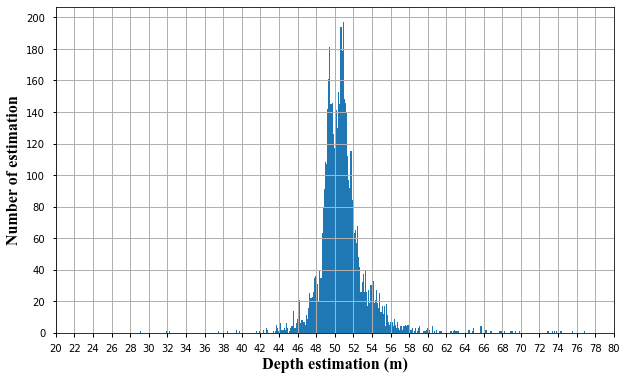

In [134]:
fig = plt.figure(figsize=[10,6])
ax = fig.gca()
x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(20)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(20,80)

n, bins_limits, patches = plt.hist(z, bins=400)

plt.xlabel('Depth estimation (m)', font1)  
plt.ylabel('Number of estimation', font1)  
plt.grid()
# plt.legend(prop=font2)
plt.show()


In [135]:
# find the mid value
sort_z = np.sort(z)
mid = sort_z[int(sort_z.size/2)]
mid

50.596225739

In [136]:
max_index = np.argmax(n)
max_index

182

In [137]:
print(bins_limits[max_index])

50.852167071880004
